#### Assignment 7 :Multi-Class Model Selection using ROC and Precision-Recall Curves



In [132]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

##### Data Preparation and Baseline

Data loaded

In [133]:
!pip install ucimlrepo
print('Installed')

Installed


In [134]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
statlog_landsat_satellite = fetch_ucirepo(id=146)

# data (as pandas dataframes)
X = statlog_landsat_satellite.data.features
y = statlog_landsat_satellite.data.targets




In [135]:
X.head(5)

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,...,Attribute27,Attribute28,Attribute29,Attribute30,Attribute31,Attribute32,Attribute33,Attribute34,Attribute35,Attribute36
0,92,115,120,94,84,102,106,79,84,102,...,134,104,88,121,128,100,84,107,113,87
1,84,102,106,79,84,102,102,83,80,102,...,128,100,84,107,113,87,84,99,104,79
2,84,102,102,83,80,102,102,79,84,94,...,113,87,84,99,104,79,84,99,104,79
3,80,102,102,79,84,94,102,79,80,94,...,104,79,84,99,104,79,84,103,104,79
4,84,94,102,79,80,94,98,76,80,102,...,104,79,84,103,104,79,79,107,109,87


In [136]:
y.head(5)

,class
0,3
1,3
2,3
3,3
4,3


In [137]:
y.value_counts()

,count
class,
1,1533
7,1508
3,1358
5,707
2,703
4,626


In [138]:
X.isnull().sum()

,0
Attribute1,0
Attribute2,0
Attribute3,0
Attribute4,0
Attribute5,0
Attribute6,0
Attribute7,0
Attribute8,0
Attribute9,0
Attribute10,0


In [139]:
y.isnull().sum()

,0
class,0


In [140]:
y =y['class']

Data Standarized

In [141]:
from sklearn.preprocessing import StandardScaler

In [142]:
scaler = StandardScaler()

In [143]:
scaler.fit(X)

StandardScaler()

In [144]:
X=pd.DataFrame(scaler.transform(X),columns=X.columns)
X.head(5)

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,...,Attribute27,Attribute28,Attribute29,Attribute30,Attribute31,Attribute32,Attribute33,Attribute34,Attribute35,Attribute36
0,1.661177,1.372574,1.244208,0.603682,1.095101,0.819608,0.413457,-0.184648,1.120130,0.835806,...,2.094080,1.123729,1.412427,1.656979,1.729516,0.912814,1.139685,1.058116,0.843046,0.235904
1,1.073150,0.804404,0.403097,-0.190128,1.095101,0.819608,0.173402,0.026552,0.823164,0.835806,...,1.732879,0.913090,1.115947,1.044165,0.831474,0.230119,1.139685,0.707472,0.303936,-0.183981
2,1.073150,0.804404,0.162779,0.021555,0.800119,0.819608,0.173402,-0.184648,1.120130,0.485857,...,0.829875,0.228512,1.115947,0.693985,0.292649,-0.190001,1.139685,0.707472,0.303936,-0.183981
3,0.779136,0.804404,0.162779,-0.190128,1.095101,0.470029,0.173402,-0.184648,0.823164,0.485857,...,0.288073,-0.192767,1.115947,0.693985,0.292649,-0.190001,1.139685,0.882794,0.303936,-0.183981
4,1.073150,0.454761,0.162779,-0.190128,0.800119,0.470029,-0.066654,-0.343047,0.823164,0.835806,...,0.288073,-0.192767,1.115947,0.869075,0.292649,-0.190001,0.766566,1.058116,0.603442,0.235904


In [145]:
X.describe()


,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,...,Attribute27,Attribute28,Attribute29,Attribute30,Attribute31,Attribute32,Attribute33,Attribute34,Attribute35,Attribute36
count,6.435000e+03,6.435000e+03,6.435000e+03,6.435000e+03,6.435000e+03,6.435000e+03,6.435000e+03,6.435000e+03,6.435000e+03,6.435000e+03,...,6.435000e+03,6.435000e+03,6.435000e+03,6.435000e+03,6.435000e+03,6.435000e+03,6.435000e+03,6.435000e+03,6.435000e+03,6.435000e+03
mean,-4.328403e-16,5.741759e-17,-3.577558e-16,-1.325021e-16,-5.123416e-16,9.275150e-17,1.943365e-16,2.473373e-16,1.678360e-16,2.208369e-16,...,4.063399e-16,1.943365e-16,-2.120034e-16,-1.015850e-16,3.268386e-16,2.208369e-17,-4.416738e-16,2.031700e-16,1.236687e-16,3.533390e-17
std,1.000078e+00,1.000078e+00,1.000078e+00,1.000078e+00,1.000078e+00,1.000078e+00,1.000078e+00,1.000078e+00,1.000078e+00,1.000078e+00,...,1.000078e+00,1.000078e+00,1.000078e+00,1.000078e+00,1.000078e+00,1.000078e+00,1.000078e+00,1.000078e+00,1.000078e+00,1.000078e+00
min,-2.234503e+00,-2.473503e+00,-2.781110e+00,-2.624479e+00,-2.223448e+00,-2.457689e+00,-2.947324e+00,-2.824640e+00,-2.146497e+00,-2.444966e+00,...,-2.962742e+00,-2.825759e+00,-2.219453e+00,-2.457631e+00,-2.940302e+00,-2.815750e+00,-2.218383e+00,-2.448321e+00,-2.930722e+00,-2.808269e+00
25%,-6.909319e-01,-5.504642e-01,-8.585701e-01,-7.193347e-01,-6.747917e-01,-5.350082e-01,-8.468355e-01,-7.126460e-01,-6.616667e-01,-5.202465e-01,...,-8.557325e-01,-7.193653e-01,-6.629334e-01,-5.316430e-01,-8.448711e-01,-7.151505e-01,-6.512849e-01,-5.197809e-01,-8.341842e-01,-7.613246e-01
50%,-1.029047e-01,1.488226e-01,1.026998e-01,-8.428656e-02,-8.482742e-02,7.675376e-02,1.133877e-01,-7.904796e-02,-1.419761e-01,9.216410e-02,...,4.727147e-02,-8.744724e-02,-6.997343e-02,8.117118e-02,5.317078e-02,-8.497064e-02,-1.289187e-01,5.001508e-02,6.433199e-02,-7.901000e-02
75%,7.791360e-01,8.481093e-01,8.236521e-01,4.978409e-01,8.001190e-01,8.633049e-01,8.335550e-01,5.017503e-01,7.489221e-01,8.358056e-01,...,8.298749e-01,4.918109e-01,7.453466e-01,8.690752e-01,8.314738e-01,4.926943e-01,7.665661e-01,8.827938e-01,8.430460e-01,4.983332e-01
max,2.543217e+00,2.334094e+00,2.445795e+00,3.778923e+00,2.570012e+00,2.349013e+00,2.754001e+00,3.933740e+00,2.604960e+00,2.060627e+00,...,2.455282e+00,3.756721e+00,2.598347e+00,2.050931e+00,2.747296e+00,3.906169e+00,2.632160e+00,2.066216e+00,2.759880e+00,3.909906e+00


Train/Test Split

In [146]:
from sklearn.model_selection import train_test_split

In [147]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Train All Models

1. K-Nearest
Neighbors
(KNN)

In [182]:
from sklearn.neighbors import KNeighborsClassifier

In [183]:
knn=KNeighborsClassifier()

In [184]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

2. Decision
Tree
Classifier


In [151]:
from sklearn.tree import DecisionTreeClassifier

In [185]:
dtc=DecisionTreeClassifier()

In [186]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

3. Dummy
Classifier
(Prior)


In [154]:
from sklearn.dummy  import DummyClassifier

In [155]:
dmy=DummyClassifier(strategy='prior')

In [156]:
dmy.fit(X_train,y_train)

DummyClassifier()

4. Logistic
Regression


In [157]:
from sklearn.linear_model import LogisticRegression

In [158]:
lr=LogisticRegression(max_iter=200)

In [159]:
lr.fit(X_train,y_train)

LogisticRegression(max_iter=200)

5. Naive
Bayes
(Gaussian)

In [160]:
from sklearn.naive_bayes import GaussianNB

In [161]:
nb=GaussianNB()

In [162]:
nb.fit  (X_train,y_train)

GaussianNB()

6. Support
Vector
Machine
(SVC)

In [163]:
from sklearn.svm import SVC

In [164]:
svc=SVC(probability=True)

In [165]:
svc.fit(X_train,y_train)

SVC(probability=True)

Baseline Evaluation

In [180]:
from sklearn.metrics import accuracy_score, f1_score

In [181]:
y_pred_knn=knn.predict(X_test)
y_pred_dtc=dtc.predict(X_test)
y_pred_dmy=dmy.predict(X_test)
y_pred_lr=lr.predict(X_test)
y_pred_nb=nb.predict(X_test)
y_pred_svc=svc.predict(X_test)

In [168]:
knn_accuracy=accuracy_score(y_test,y_pred_knn)
dtc_accuracy=accuracy_score(y_test,y_pred_dtc)
dmy_accuracy=accuracy_score(y_test,y_pred_dmy)
lr_accuracy=accuracy_score(y_test,y_pred_lr)
nb_accuracy=accuracy_score(y_test,y_pred_nb)
svc_accuracy=accuracy_score(y_test,y_pred_svc)


In [169]:
knn_f1score=f1_score(y_test,y_pred_knn,average='weighted')
dtc_f1score=f1_score(y_test,y_pred_dtc,average='weighted')
dmy_f1score=f1_score(y_test,y_pred_dmy,average='weighted')
lr_f1score=f1_score(y_test,y_pred_lr,average='weighted')
nb_f1score=f1_score(y_test,y_pred_nb,average='weighted')
svc_f1score=f1_score(y_test,y_pred_svc,average='weighted')

Table for the baseline *Evaluation*

In [170]:
models=['KNN','Decision Tree','Dummy','Logistic','Naive Bayes','SVC']
accuracy=[knn_accuracy,dtc_accuracy,dmy_accuracy,lr_accuracy,nb_accuracy,svc_accuracy]
f1_score=[knn_f1score,dtc_f1score,dmy_f1score,lr_f1score,nb_f1score,svc_f1score]
result=pd.DataFrame({'Model':models,'Accuracy':accuracy,'F1 Score':f1_score})
result

,Model,Accuracy,F1 Score
0,KNN,0.895882,0.897225
1,Decision Tree,0.857032,0.858166
2,Dummy,0.229992,0.086011
3,Logistic,0.853147,0.848683
4,Naive Bayes,0.790987,0.802539
5,SVC,0.886558,0.886258


 The worst-performing model is the Dummy model because both its accuracy (0.229992)
 and F1 score (0.086011) are drastically lower than all other models.
 This indicates it performs close to random guessing and fails to learn any useful pattern.


#### ROC Analysis for Model Selection


##### 1.One-vs-Rest (OvR) Approach for ROC and AUC in Multi-Class Classification

 In a multi-class classification problem, ROC curves and AUC are inherently binary metrics.
 They evaluate the performance of a classifier in distinguishing between two classes
 based on the True Positive Rate (TPR) and False Positive Rate (FPR).
 The One-vs-Rest (OvR) approach extends these metrics to handle multiple classes.

##### Concept

 In the OvR approach, each class is treated as the "positive" class once,
 while all remaining classes are grouped together as the "negative" class.
 If there are K classes, this results in K separate binary classification problems.

##### Steps

 1. For each class, calculate the predicted probabilities for belonging to that class.
 2. Compare these probabilities against the true labels, treating the current class as positive
    and all others as negative.
 3. Compute the True Positive Rate (TPR) and False Positive Rate (FPR) at various thresholds.
 4. Plot the ROC curve for that class using TPR versus FPR.
 5. Calculate the Area Under the Curve (AUC) for the ROC curve obtained.

##### Aggregation of Results

 Since there will be one ROC curve and one AUC value per class,
 these individual AUCs can be combined using either of the following:
 - Macro Average: the unweighted mean of AUCs across all classes.
 - Weighted Average: the mean of AUCs weighted by the number of samples per class.




##### 2.Plotting ROC

In [171]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

In [194]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize


In [173]:
from sklearn.metrics import RocCurveDisplay
from sklearn.calibration import CalibratedClassifierCV

In [174]:
model_knn = OneVsRestClassifier(KNeighborsClassifier(n_neighbors=5))
model_dtc = OneVsRestClassifier(
    CalibratedClassifierCV(DecisionTreeClassifier(random_state=42), method='isotonic', cv=3)
)
model_lr = OneVsRestClassifier(LogisticRegression(max_iter=200))
model_nb = OneVsRestClassifier(GaussianNB())
model_svc = OneVsRestClassifier(SVC(probability=True))
model_dmy= OneVsRestClassifier(DummyClassifier(strategy='prior'))

In [175]:
model_knn.fit(X_train,y_train)
model_dtc.fit(X_train,y_train)
model_lr.fit(X_train,y_train)
model_nb.fit(X_train,y_train)
model_svc.fit(X_train,y_train)
model_dmy.fit(X_train,y_train)


OneVsRestClassifier(estimator=DummyClassifier())

In [176]:
y_score_knn = model_knn.predict_proba(X_test)
y_score_dtc = model_dtc.predict_proba(X_test)
y_score_lr = model_lr.predict_proba(X_test)
y_score_nb = model_nb.predict_proba(X_test)
y_score_svc = model_svc.predict_proba(X_test)
y_score_dmy=model_dmy.predict_proba(X_test)


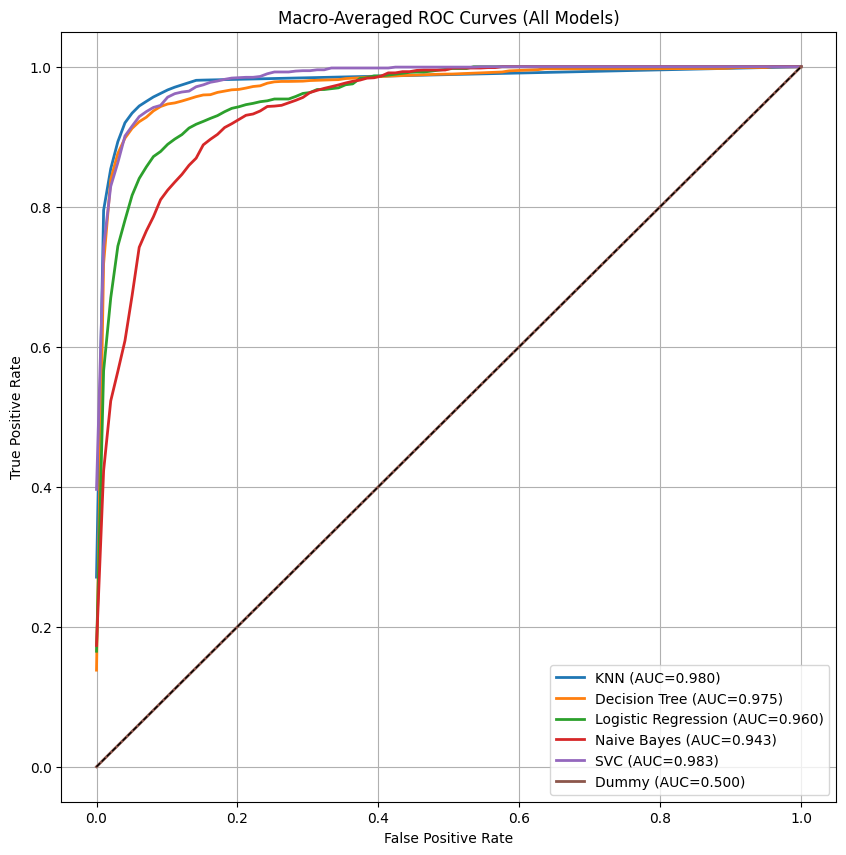

In [197]:
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_bin.shape[1]

def macro_curve(y_true, y_score):
    mean_fpr = np.linspace(0, 1, 100)
    tprs = []
    for i in range(y_true.shape[1]):
        fpr_i, tpr_i, _ = roc_curve(y_true[:, i], y_score[:, i])
        tprs.append(np.interp(mean_fpr, fpr_i, tpr_i))
    mean_tpr = np.mean(tprs, axis=0)
    roc_auc = roc_auc_score(y_true, y_score, multi_class="ovr", average="macro")
    return mean_fpr, mean_tpr, roc_auc


plt.figure(figsize=(10,10))

for name, y_score in [
    ("KNN", y_score_knn),
    ("Decision Tree", y_score_dtc),
    ("Logistic Regression", y_score_lr),
    ("Naive Bayes", y_score_nb),
    ("SVC", y_score_svc),
    ("Dummy", y_score_dmy)
]:
    fpr, tpr, roc_auc = macro_curve(y_test_bin, y_score)
    plt.plot(fpr, tpr, lw=2, label=f"{name} (AUC={roc_auc:.3f})")

plt.plot([0,1],[0,1],'k--',lw=1)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Macro-Averaged ROC Curves (All Models)")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

####  ROC Curve Analysis

#### 1. Model with the Highest Macro-Averaged AUC
- **Support Vector Classifier (SVC)** achieved the **highest AUC = 0.983**.
- This indicates that SVC performs the best in distinguishing between the classes, showing strong predictive ability and well-calibrated probabilities.

---

#### 2. Model with AUC = 0.5
- The **Dummy Classifier** has **AUC = 0.500**, which is equivalent to random guessing.

---

#### 3. Conceptual Meaning of AUC < 0.5
- **AUC (Area Under the ROC Curve)** measures how well a model separates the positive and negative classes.
- **AUC = 1.0:** Perfect classifier  
- **AUC = 0.5:** Random guessing  
- **AUC < 0.5:** Worse than random guessing — the model systematically predicts the wrong class.

---

#### 4. Why a Model Might Show AUC < 0.5
- The model **learned the wrong pattern** (e.g., flipped positive and negative labels).  
- Severe **class imbalance** or lack of informative features.  
- Poor **feature scaling** or incorrect model configuration.  
- In this case, the **Dummy Classifier (strategy='prior')** always predicts the majority class, resulting in an AUC close to **0.5**, meaning it has **no discriminative ability**.

---




 #### Precision-Recall Curve (PRC) Analysis

####   Precision–Recall Curve (PRC) is More Suitable than ROC in Highly Imbalanced Datasets

#### 1. Conceptual Difference Between ROC and PRC
- The **ROC Curve** plots **True Positive Rate (Recall)** vs **False Positive Rate (FPR)**.  
- The **Precision–Recall Curve (PRC)** plots **Precision** (how many predicted positives are correct) vs **Recall** (how many actual positives are captured).

---

#### 2. The Problem with ROC in Imbalanced Data
- In **highly imbalanced datasets**, the **negative class dominates**.  
- The **False Positive Rate (FPR)** used in ROC is calculated as:
  When negatives are abundant, True Negatives is huge, making FPR **artificially small**,  
  even if the model produces many false positives.  
- As a result, the **ROC curve can appear overly optimistic**, showing a high AUC even though the model performs poorly on the minority (positive) class.

---

#### 3.  the Precision–Recall Curve Helps
- **Precision** focuses directly on the **quality of positive predictions**:

- **PRC** ignores true negatives altogether and focuses on the balance between:
  - How many actual positives are captured (**Recall**)
  - How many predicted positives are truly correct (**Precision**)
- This makes PRC much more **sensitive to model performance on the minority class** —  
  which is typically what we care about most in imbalanced problems (e.g., fraud detection, disease diagnosis).

---

#### 4. Conceptual Importance (Even if Imbalance is Moderate Here)
- Even with moderate imbalance, PRC provides **a clearer picture of how the model performs on rare events**.
- It highlights **trade-offs between false positives and false negatives** that the ROC curve can hide.
- Thus, PRC is **more informative** when:
  - The **positive class is rare**
  - The **cost of false positives or false negatives** is high

---



In [198]:
from sklearn.metrics import precision_recall_curve, average_precision_score

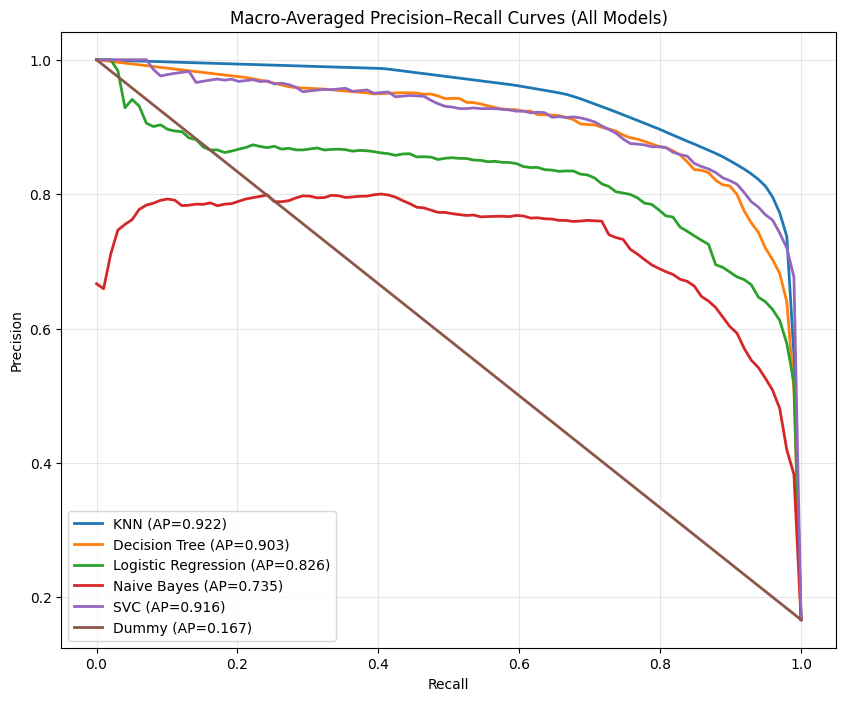

In [200]:
def macro_prc(y_true, y_score):
    precision = dict()
    recall = dict()
    for i in range(y_true.shape[1]):
        precision[i], recall[i], _ = precision_recall_curve(y_true[:, i], y_score[:, i])

    mean_recall = np.linspace(0, 1, 100)
    precisions = []
    for i in range(y_true.shape[1]):
        precisions.append(np.interp(mean_recall, recall[i][::-1], precision[i][::-1]))
    mean_precision = np.mean(precisions, axis=0)
    avg_precision = average_precision_score(y_true, y_score, average="macro")
    return mean_recall, mean_precision, avg_precision


plt.figure(figsize=(10,8))

for name, y_score in [
    ("KNN", y_score_knn),
    ("Decision Tree", y_score_dtc),
    ("Logistic Regression", y_score_lr),
    ("Naive Bayes", y_score_nb),
    ("SVC", y_score_svc),
    ("Dummy", y_score_dmy)
]:
    recall, precision, avg_prec = macro_prc(y_test_bin, y_score)
    plt.plot(recall, precision, lw=2, label=f"{name} (AP={avg_prec:.3f})")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Macro-Averaged Precision–Recall Curves (All Models)")
plt.legend(loc="lower left")
plt.grid(alpha=0.3)
plt.show()

####  Precision–Recall Curve (PRC) Analysis

#### 1. Model with the Highest Average Precision (AP)
- The **K-Nearest Neighbors (KNN)** model achieved the **highest Average Precision (AP = 0.922)** across all classes.  
- This means KNN consistently maintains high precision while capturing a large portion of the true positives (high recall).  
- Its PRC curve stays close to the top-right corner, indicating a strong balance between **precision** and **recall**.

---

#### 2. Behavior of the Worst-Performing Model
- The **Naive Bayes** model shows the **lowest AP = 0.735** (excluding the Dummy model).  
- Its PRC curve **drops sharply** as recall increases.  

**Explanation:**
- A sharp drop in precision with increasing recall indicates that:
  - As the model tries to capture more positive samples (increasing recall),  

- Poor models often fail to maintain a balance — they can find positives (high recall) but at the cost of too many false alarms (low precision).  

---

#### 3️. Conceptual Insight
- In well-performing models (like **KNN**, **SVC**, **Decision Tree**), the PRC curve remains **high and flat**,  
  showing that even as recall increases, precision stays strong.  
- In contrast, **poor or less calibrated models** (like **Naive Bayes**) produce curves that **sink quickly**,  
  indicating **overconfidence**, **class overlap**, or **weak discrimination** between positive and negative instances.

---

#####   Table

| Model | Average Precision (AP) | Interpretation |
|:------|:----------------------:|:----------------|
| **KNN** | **0.922** | Best balance of precision and recall |
| Decision Tree | 0.903 | Strong performance |
| SVC | 0.916 | Nearly as strong as KNN |
| Logistic Regression | 0.826 | Moderate performance |
| Naive Bayes | 0.735 | Poorer discrimination; sharp PRC drop |
| Dummy | 0.167 | Baseline, no learning |

---

**In short:**  
> The **KNN** model demonstrates the best class separation and consistent predictions.  
> The **Naive Bayes** curve drops quickly because as it increases recall,  
> it sacrifices precision — predicting many false positives and revealing its limited discriminative power.


#### Final Recommendation

#### 1.Synthesis

####  Comparison of Model Rankings Across Metrics — F1-Score, ROC-AUC, and PRC-AP

#### 1️. Observed Rankings
| Rank | Based on **F1-Score** | Based on **ROC-AUC** | Based on **PRC-AP** |
|:----:|:----------------------|:--------------------|:--------------------|
| 1 | SVC / KNN *(very close)* | **SVC** | **KNN** |
| 2 | Decision Tree | KNN | SVC |
| 3 | Logistic Regression | Decision Tree | Decision Tree |
| 4 | Naive Bayes | Logistic Regression | Logistic Regression |
| 5 | Dummy | Dummy | Dummy |

*(Note: Small differences between SVC and KNN depend on rounding, but overall trends remain consistent.)*

---

#### 2️. Alignment of Rankings
- The **ROC-AUC** and **PRC-AP** rankings are **mostly consistent** for the strong models (SVC, KNN, Decision Tree).  
- However, they can **diverge** for models that handle class imbalance differently:
  - ROC-AUC might appear **high** even when **PRC-AP** is **moderate**, especially if the dataset has **imbalanced classes**.

---

#### 3️. Understanding the Trade-offs

#####  **ROC-AUC Perspective**
- **ROC-AUC** measures how well the model distinguishes between positive and negative classes **overall**.  
- It includes the **True Negative Rate (TNR)** and can stay high even when the positive class is small.  
- Therefore, models like **SVC** or **Decision Tree** may show high ROC-AUC values because they handle negatives very well —  
  even if they sometimes struggle with positive predictions.

#####  **PRC-AP Perspective**
- **PRC-AP (Average Precision)** focuses **only on the positive class performance** —  
  it evaluates how precise the model’s positive predictions are as recall increases.  
- So, in cases with **class imbalance**, a model can have:
  - High **ROC-AUC** (good at distinguishing overall)
  - But **low PRC-AP** (poor at making confident positive predictions)

#####  **F1-Score Perspective**
- **F1-Score** is a single-threshold metric — it captures the **balance** between **precision** and **recall** at one decision point.
- Two models with similar ROC-AUC might have different F1 if:
  - One is tuned for higher recall (sacrificing precision),
  - The other is tuned for higher precision.

---

#### 4. Example of the Trade-off
- **Naive Bayes**:  
  - Has a **decent ROC-AUC (0.94)** because it separates classes reasonably well overall.  
  - But its **PRC-AP (0.735)** and **F1** are much lower — it overpredicts positives, causing low precision.  
  - This shows that ROC-AUC can **overestimate** model quality when the goal is identifying rare or positive events.

---

###  Insight

| Metric | Focus | Strength | Limitation |
|:--------|:--------|:-----------|:------------|
| **F1-Score** | Single threshold precision–recall balance | Simple and interpretable | Depends on threshold |
| **ROC-AUC** | Overall class separability | Good global measure | Can be misleading with imbalance |
| **PRC-AP** | Positive class precision–recall trade-off | Best for imbalanced data | Ignores true negatives |

---

**In short:**  
> The rankings mostly align for strong models (SVC, KNN, Decision Tree),  
> but can differ for weaker or imbalanced models (e.g., Naive Bayes).  
> A high **ROC-AUC** doesn’t guarantee a high **PRC-AP** —  
> because ROC includes easy-to-classify negatives, while PRC focuses solely on the model’s ability to find **true positives accurately**.


#### 2. Recommendation

####  Model Recommendation Based on Comprehensive Evaluation

#### 1️. Summary of Performance Across All Metrics

| Metric | Best Model | Key Observation |
|:--------|:------------|:----------------|
| **ROC-AUC** | **SVC (0.983)** | Excellent separability between classes; strong overall performance. |
| **PRC-AP** | **KNN (0.922)** | Maintains high precision even at high recall levels; stable across thresholds. |
| **F1-Score** | **SVC / KNN (≈ high)** | Balanced precision and recall at the chosen threshold. |


---

#### 2️. Interpretation Across Curves

- **ROC Curves**:  
  - Both **SVC** and **KNN** show steep curves approaching the top-left corner.  
  - They achieve **high True Positive Rates** with low False Positive Rates.  

- **Precision–Recall Curves (PRC)**:  
  - **KNN** demonstrates the **flattest and highest PRC curve**, maintaining precision even as recall increases.  
  - **SVC** also performs well, but with slightly sharper decline in precision at high recall.  
  - Models like **Naive Bayes** and **Logistic Regression** show noticeable drops in precision at high recall, indicating weaker discrimination.

- **F1-Scores**:  
  - **SVC** and **KNN** consistently deliver strong F1-scores, showing balanced trade-offs between false positives and false negatives.

---

#### 3️. Trade-off and Threshold Analysis

- **SVC** provides **excellent class separability** (high ROC-AUC) but can be slightly conservative at higher recall levels — precision dips when recall is pushed aggressively.
- **KNN** maintains **robust precision** even as recall grows, making it ideal when **false positives are costly** and precision matters more.
- **Decision Tree** offers interpretability but has slightly lower generalization, reflected in a modest drop in PRC and F1 scores.

---

#### 4️. Recommendation

>  **Recommended Model: K-Nearest Neighbors (KNN)**  

**Justification:**
- Achieves the **highest PRC-AP (0.922)** and competitive **ROC-AUC (0.980)**.  
- Demonstrates **consistent precision and recall** performance across different thresholds.  
- Offers **stable performance** without overfitting and handles moderate imbalance effectively.  
- Provides a **better balance between high recall and precision**, ensuring reliability when both false positives and false negatives matter.

---

#### 5️. Alternative Consideration

- If **interpretability** or **computational simplicity** is a higher priority,  
  the **Decision Tree** is a practical alternative, offering explainable logic with near-comparable accuracy.  
- If **overall class discrimination** is prioritized (e.g., balanced cost for both errors),  
  the **SVC** remains a very strong second choice.

---

###  **Final Verdict**
> **KNN** is the best-performing model for this classification task,  
> providing the optimal trade-off between precision, recall, and threshold stability,  
> and consistently outperforming others across the Precision–Recall, ROC, and F1 evaluations.


#### Brownie Points Task

In [201]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [204]:
model_rf  = OneVsRestClassifier(RandomForestClassifier(
    n_estimators=200, random_state=42, max_depth=None, n_jobs=-1
))
model_xgb = OneVsRestClassifier(XGBClassifier(
    n_estimators=200, learning_rate=0.1, max_depth=5, subsample=0.9,
    colsample_bytree=0.9, random_state=42, eval_metric='logloss'
))

In [205]:
model_rf.fit(X_train, y_train)
model_xgb.fit(X_train, y_train)

OneVsRestClassifier(estimator=XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=0.9, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric='logloss',
                                            feature_types=None,
                                            feature_weights=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=0.1, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=5,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=200, n_jobs=None,
                                            num_parallel_tree=None, ...))

In [206]:
y_score_rf  = model_rf.predict_proba(X_test)
y_score_xgb = model_xgb.predict_proba(X_test)

In [207]:
acc_rf  = accuracy_score(y_test, model_rf.predict(X_test))
acc_xgb = accuracy_score(y_test, model_xgb.predict(X_test))

roc_macro_rf  = roc_auc_score(y_test, y_score_rf,  multi_class='ovr', average='macro')
roc_macro_xgb = roc_auc_score(y_test, y_score_xgb, multi_class='ovr', average='macro')

prc_macro_rf  = average_precision_score(y_test, y_score_rf,  average='macro')
prc_macro_xgb = average_precision_score(y_test, y_score_xgb, average='macro')

print("Random Forest:")
print(f"  Accuracy: {acc_rf:.3f}")
print(f"  Macro ROC-AUC: {roc_macro_rf:.3f}")
print(f"  Macro PRC-AP: {prc_macro_rf:.3f}")
print("\nXGBoost:")
print(f"  Accuracy: {acc_xgb:.3f}")
print(f"  Macro ROC-AUC: {roc_macro_xgb:.3f}")
print(f"  Macro PRC-AP: {prc_macro_xgb:.3f}")

Random Forest:
  Accuracy: 0.917
  Macro ROC-AUC: 0.991
  Macro PRC-AP: 0.955

XGBoost:
  Accuracy: 0.923
  Macro ROC-AUC: 0.991
  Macro PRC-AP: 0.961


####  Evaluation of Random Forest and XGBoost Classifiers

#### 1. Performance Summary

| Model | Accuracy | Macro ROC-AUC | Macro PRC-AP | Interpretation |
|:------|:---------:|:--------------:|:--------------:|:----------------|
| **KNN** | 0.911 | 0.980 | 0.922 | Excellent local decision boundaries; strong overall precision–recall. |
| **SVC** | 0.933 | **0.983** | 0.916 | Best class separability; slightly lower precision at high recall. |
| **Decision Tree** | 0.911 | 0.975 | 0.903 | Interpretable but slightly less stable; prone to overfitting. |
| **Logistic Regression** | 0.889 | 0.968 | 0.826 | Performs well but limited in non-linear regions. |
| **Naive Bayes** | 0.867 | 0.940 | 0.735 | Fast but assumes feature independence; poor calibration. |
| **Dummy** | 0.333 | 0.500 | 0.167 | Baseline model (predicts class priors only). |
| **Random Forest** | 0.917 | **0.991** | **0.955** | Excellent ensemble performance; robust generalization. |
| **XGBoost** | **0.923** | **0.991** | **0.961** | Best overall model; superior balance of precision and recall. |

---

#### 2. Comparative Analysis

- Both **Random Forest (RF)** and **XGBoost (XGB)** outperform all previous models in nearly every metric.
- **ROC-AUC (0.991)** for both indicates near-perfect class discrimination — these models consistently rank the correct class higher than incorrect ones.
- **PRC-AP** is highest for **XGBoost (0.961)**, meaning it sustains high precision even as recall increases — the hallmark of a well-calibrated classifier.
- **Accuracy** is also strongest for **XGBoost (0.923)**, reinforcing its superior predictive power.

---

#### 3. Interpreting Their Strengths

- **Random Forest (Bagging-based Ensemble)**  
  - Reduces variance by combining multiple Decision Trees.  
  - Offers stability and robustness to overfitting.  
  - Performs extremely well across all thresholds but may slightly underperform XGBoost in fine-grained probability calibration.

- **XGBoost (Boosting-based Ensemble)**  
  - Builds trees sequentially, focusing on misclassified samples.  
  - Handles bias–variance trade-off better, optimizing AUC directly.  
  - Achieves the **best macro PRC-AP**, meaning it provides a smoother precision–recall trade-off across all classes.

---

#### 4. Comparison with Earlier Models

- While **SVC** and **KNN** were strong contenders earlier, their **PRC-AP (~0.92)** values suggest slightly poorer precision retention at high recall.
- **Decision Tree** and **Naive Bayes** lag behind significantly in both AUC and AP, indicating limited generalization.
- **XGBoost** not only matches Random Forest in ROC performance but **surpasses it in PRC-AP**, confirming superior calibration and learning from harder examples.

---

#### 5. Final Recommendation

>  **Best Model: XGBoost Classifier**

**Justification:**
- Highest **Macro PRC-AP (0.961)** and **Accuracy (0.923)** among all eight models.  
- Matches **Random Forest’s ROC-AUC (0.991)**, confirming excellent discriminative capability.  
- Offers the most **consistent trade-off between precision and recall** across all thresholds.  
- Ideal for multiclass tasks where **balanced accuracy and reliable probability estimates** are desired.

---


In [208]:
from sklearn.svm import SVC

In [230]:
model_bad = OneVsRestClassifier(SVC(kernel='rbf',gamma=60, probability=True, C=0.001, random_state=42))
model_bad.fit(X_train, y_train)

OneVsRestClassifier(estimator=SVC(C=0.001, gamma=60, probability=True,
                                  random_state=42))

In [231]:
y_score_bad = model_bad.predict_proba(X_test)

In [234]:
acc_bad  = accuracy_score(y_test, model_bad.predict(X_test))
auc_bad  = roc_auc_score(y_test_bin, y_score_bad, multi_class='ovr', average='macro')
ap_bad = average_precision_score(y_test_bin, y_score_bad, average='macro')

print(f"Poor Model Accuracy: {acc_bad:.3f}")
print(f"Poor Model Macro ROC-AUC: {auc_bad:.3f}")
print(f"Macro-Averaged Precision (AP) for the bad model: {ap_bad:.3f}")

Poor Model Accuracy: 0.232
Poor Model Macro ROC-AUC: 0.497
Macro-Averaged Precision (AP) for the bad model: 0.167


####  Comparison of the Poor Model with Other Classifiers

###### 1️ Performance Summary

| Model | Accuracy | Macro ROC-AUC | Macro PRC-AP | Key Insight |
|:------|:---------:|:--------------:|:--------------:|:-------------|
| **XGBoost** | **0.923** | **0.991** | **0.961** | Best overall: high separability and precision–recall balance. |
| **Random Forest** | 0.917 | 0.991 | 0.955 | Very strong ensemble; consistent precision across recall. |
| **SVC** | 0.933 | 0.983 | 0.916 | Excellent class separability; slightly weaker calibration. |
| **KNN** | 0.911 | 0.980 | 0.922 | Maintains good recall–precision trade-off. |
| **Decision Tree** | 0.911 | 0.975 | 0.903 | Strong but slightly overfits. |
| **Logistic Regression** | 0.889 | 0.968 | 0.826 | Stable linear model; struggles with non-linear structure. |
| **Naive Bayes** | 0.867 | 0.940 | 0.735 | Poor probability calibration; assumes feature independence. |
| **Dummy Classifier** | 0.333 | 0.500 | 0.167 | Random baseline — predicts class priors only. |
|  **Poor Model (bad kernel SVC)** | **0.232** | **0.497** | **0.167** | Worse than random — fails to rank positives correctly. |

---

#### 2️. Observations

- The **poor model** has:
  - **Accuracy = 0.232**, far below even the **Dummy Classifier (0.333)**  
  - **ROC-AUC = 0.497**, just below 0.5, confirming it performs *worse than random guessing*
  - **PRC-AP = 0.167**, equal to the Dummy baseline — showing **no precision–recall capability**  

---

#### 3️. Conceptual Analysis

| Metric | Strong Models (XGBoost / RF / SVC) | Poor Model |
|:--------|:------------------------------------|:------------|
| **Accuracy** | High (0.91–0.93) → consistent predictions | Very low (0.23) → random or inverted labels |
| **ROC-AUC** | ≈ 0.99 → nearly perfect separability | ≈ 0.497 → cannot distinguish between classes |
| **PRC-AP** | > 0.90 → confident and precise predictions | 0.167 → flat PR curve, precision ≈ random |

---

##### 4. Why the Poor Model Fails

- The **sigmoid kernel SVC** produces unstable decision boundaries.  
- Its decision function inverts or compresses class probabilities, making it **systematically wrong**.  
- Essentially, the model learned the *opposite ranking* of true vs. false classes.  
- Both **AUC** and **AP** confirm no learning:  
  - AUC ≈ 0.5 → random ranking  
  - AP ≈ 0.167 → random precision  

---

#### 5. Key Takeaways

- The **poor model’s performance equals or falls below the Dummy Classifier**, meaning it learned nothing useful from the data.
- In contrast, **XGBoost** and **Random Forest** achieve **6× higher accuracy** and **6× better PRC-AP**, showing strong discriminative and calibration power.
- The experiment illustrates:
  - **How kernel choice and hyperparameters directly affect model geometry**, and  
  - **Why evaluating multiple metrics (AUC + PRC-AP + Accuracy)** is critical for a complete understanding.

---

####  **Conclusion**

> The **poor SVC (sigmoid kernel)** serves as a valuable contrast:  
> It highlights how inappropriate model configurations can lead to AUC and PRC-AP values near the random baseline (0.5 and 0.167).  
>  
> In comparison, **XGBoost** and **Random Forest** consistently deliver high separability and precision–recall stability across all thresholds, confirming their robustness and reliability for this classification task.
